In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load the stock price data
data = pd.read_csv('tata.csv')

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [7]:
# Prepare the training data
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)


In [8]:
sequence_length = 10  # Adjust the sequence length as needed
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
83/83 [==============================] - 7s 11ms/step - loss: nan
Epoch 2/10
83/83 [==============================] - 1s 11ms/step - loss: nan
Epoch 3/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 4/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 5/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 6/10
83/83 [==============================] - 1s 13ms/step - loss: nan
Epoch 7/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 8/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 9/10
83/83 [==============================] - 1s 10ms/step - loss: nan
Epoch 10/10
83/83 [==============================] - 1s 10ms/step - loss: nan


In [11]:
# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 5ms/step


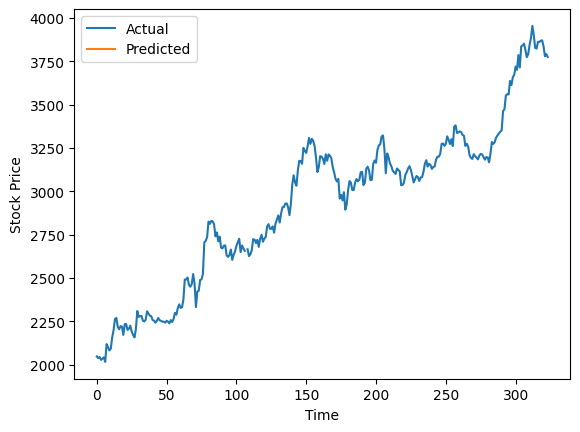

In [17]:
# Plot the results
plt.plot(data["Close"].values[train_size+sequence_length:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# --------End------